In [1]:
from IPython.display import display, Math

# Display multiple regression formula
display(Math(r'y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \cdots + \beta_n x_n + \varepsilon'))


<IPython.core.display.Math object>

In [3]:
import numpy as np
from sklearn.datasets import load_diabetes

In [5]:
X,y = load_diabetes(return_X_y=True)

In [6]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [7]:
X.shape

(442, 10)

In [8]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
LR = LinearRegression()

In [16]:
Y_pred = LR.predict(X_test)

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(Y_test,Y_pred)

0.4399338661568968

In [23]:
LR.coef_   #beta values

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [33]:
LR.intercept_

151.88331005254167

R² Score: 0.4526027629719196
Coefficients (β): [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995


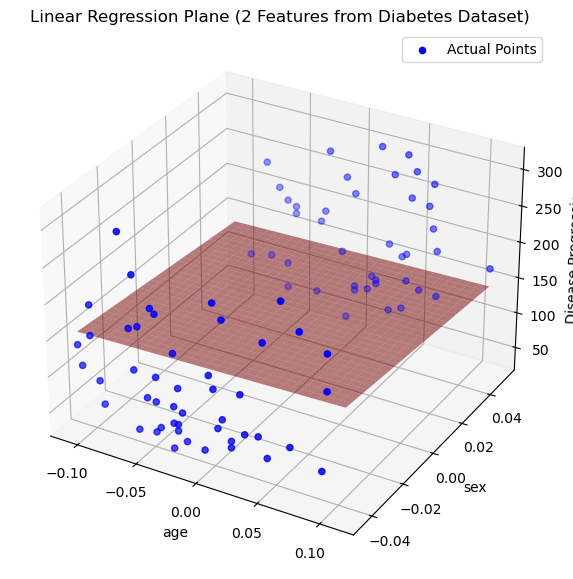

In [35]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D

# Step 2: Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Step 3: Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Linear Regression model
LR = LinearRegression()
LR.fit(X_train, Y_train)

# Step 5: Predict and evaluate
Y_pred = LR.predict(X_test)
print("R² Score:", r2_score(Y_test, Y_pred))
print("Coefficients (β):", LR.coef_)
print("Intercept:", LR.intercept_)

# Step 6: Visualize regression plane using any two features
# (for example, feature 0 and feature 1)
x1 = X_test[:, 0]
x2 = X_test[:, 1]
y = Y_test

# Create a meshgrid for plane
x1_range = np.linspace(x1.min(), x1.max(), 30)
x2_range = np.linspace(x2.min(), x2.max(), 30)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Calculate plane predictions using only the two features’ coefficients
y_pred_plane = (
    LR.intercept_
    + LR.coef_[0] * x1_grid
    + LR.coef_[1] * x2_grid
)

# Plot the 3D regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='blue', label='Actual Points')
ax.plot_surface(x1_grid, x2_grid, y_pred_plane, color='red', alpha=0.5)

ax.set_xlabel(diabetes.feature_names[0])
ax.set_ylabel(diabetes.feature_names[1])
ax.set_zlabel('Disease Progression')
ax.set_title('Linear Regression Plane (2 Features from Diabetes Dataset)')
plt.legend()
plt.show()
